To demonstrate the ``CPPPlot().ranking()`` method, we first load the example feature set from for the ``DOM_GSEC`` data (see [Breimann24c]_):

In [10]:
import matplotlib.pyplot as plt
import aaanalysis as aa
aa.options["verbose"] = False

df_seq = aa.load_dataset(name="DOM_GSEC")
df_feat = aa.load_features(name="DOM_GSEC")
df_feat = df_feat.sort_values(by="feat_importance", ascending=False).reset_index(drop=True)
aa.display_df(df_feat, show_shape=True, n_rows=7)

DataFrame shape: (150, 15)


,feature,category,subcategory,scale_name,scale_description,abs_auc,abs_mean_dif,mean_dif,std_test,std_ref,p_val_mann_whitney,p_val_fdr_bh,positions,feat_importance,feat_importance_std
1,"TMD_C_JMD_C-Seg...,11)-LIFS790102",Conformation,β-strand,β-strand,"Conformational ...n-Sander, 1979)",0.189000,0.125674,0.125674,0.183876,0.218813,0.000001,0.000039,"28,29",4.729200,4.776785
2,"TMD_C_JMD_C-Seg...2,3)-CHOP780212",Conformation,β-sheet (C-term),β-turn (1st residue),"Frequency of th...-Fasman, 1978b)",0.199000,0.065983,-0.065983,0.087814,0.105835,0.000000,0.000016,"27,28,29,30,31,32,33",4.106000,5.236574
3,"TMD_C_JMD_C-Seg...3,4)-HUTJ700102",Energy,Entropy,Entropy,"Absolute entrop...Hutchens, 1970)",0.229000,0.098224,0.098224,0.106865,0.124608,0.000000,0.000001,"31,32,33,34,35",3.111200,3.109955
4,"TMD_C_JMD_C-Seg...2,3)-AURR980110",Conformation,α-helix,α-helix (middle),"Normalized posi...ora-Rose, 1998)",0.211000,0.077355,0.077355,0.102965,0.107453,0.000000,0.000005,"27,28,29,30,31,32,33",3.048800,3.623912
5,"TMD_C_JMD_C-Pat...4,8)-JANJ790102",Energy,Free energy (unfolding),Transfer free e...(TFE) to inside,"Transfer free e...y (Janin, 1979)",0.187000,0.144354,-0.144354,0.181777,0.233103,0.000001,0.000049,"33,37",2.833600,3.640617
6,"TMD_C_JMD_C-Pat...4,8)-KANM800103",Conformation,α-helix,α-helix,"Average relativ...sa-Tsong, 1980)",0.176000,0.087846,0.087846,0.140464,0.157561,0.000004,0.000113,"24,28",2.704000,4.076269
7,"TMD_C_JMD_C-Pat...,10)-LEVM760105",Shape,Side chain length,Side chain length,"Radius of gyrat... (Levitt, 1976)",0.149000,0.073526,0.073526,0.133612,0.157088,0.000090,0.000714,"31,34,38",2.050800,2.338278


We can now use the ``CPPPlot().profile()`` method to create CPP profile showing the feature importance at single-residue resolution. We first retrieve from ``df_seq`` the sequences parts of a selected sample and provide them as parameters (``jmd_n_seq``, ``tmd_seq``, ``jmd_c_seq``) together with ``df_feat``: 

FAEDVGSNKG AIIGLMVGGVVIATVIVITLVML KKKQYTSIHH


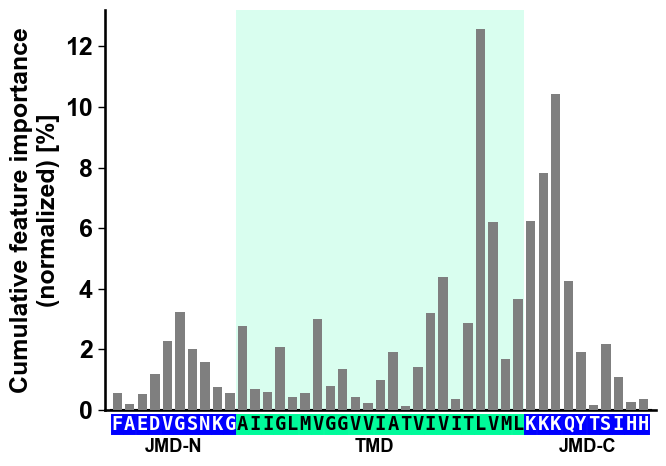

In [11]:
# Get sequence parts of first sample
jmd_n_seq, tmd_seq, jmd_c_seq = df_seq.loc[0, ["jmd_n", "tmd", "jmd_c"]]
args_seq = dict(jmd_n_seq=jmd_n_seq, tmd_seq=tmd_seq, jmd_c_seq=jmd_c_seq)
print(jmd_n_seq, tmd_seq, jmd_c_seq)

# Plot CPP profile for first sample
cpp_plot = aa.CPPPlot()
aa.plot_settings()
cpp_plot.profile(df_feat=df_feat, **args_seq)
plt.show()

Adding a new element, such as a legend, to the plot could cause overlapping of sequence characters:

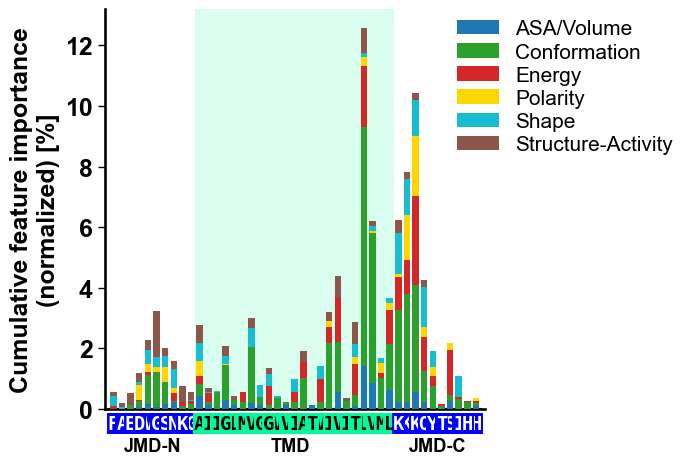

In [12]:
# Plot CPP profile for first sample with color-coded scale categories
cpp_plot = aa.CPPPlot()
aa.plot_settings()
cpp_plot.profile(df_feat=df_feat, **args_seq, add_legend_cat=True)

# Add legend right next to plot
list_cats = list(sorted(set(df_feat["category"])))
dict_color = aa.plot_get_cdict(name="DICT_CAT")
dict_color = {cat: dict_color[cat] for cat in list_cats}
fs = aa.plot_gcfs()
aa.plot_legend(dict_color=dict_color, y=1, x=0.9, n_cols=1, fontsize=fs-3)
plt.tight_layout()
plt.show()

**Avoid residue overlap by cpp_plot.update_seq_size**

The overlap of the sequence characters can be resolved by decreasing the sequence fontsize (``seq_size``) of the ``CPPPlot().profile()`` manually or by simply using the ``CPPPlot().udpdate_seq_size()`` method with the ``ax`` object of the respective plot: 

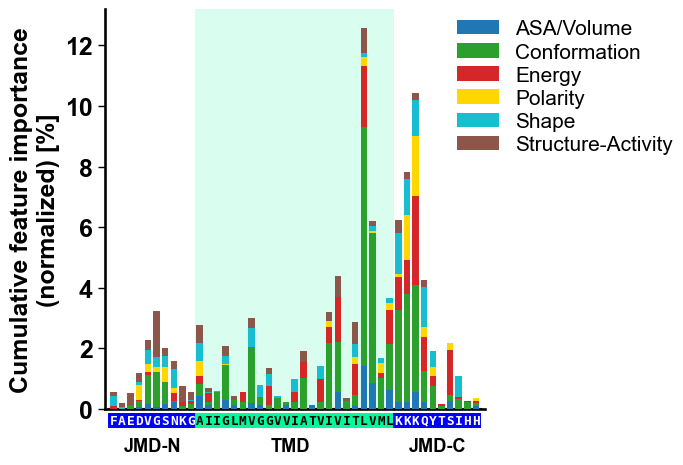

In [13]:
# Adjust size of sequence characters 
fig, ax = cpp_plot.profile(df_feat=df_feat, **args_seq, add_legend_cat=True)
aa.plot_legend(dict_color=dict_color, y=1, x=0.9, n_cols=1, fontsize=fs-3)
plt.tight_layout()

cpp_plot.update_seq_size(ax=ax) # Should be called AFTER plt.tight_layout()
plt.show()

To automatically adjust the fontsize of the part labels ('JMD-N', 'TMD', and 'JMD-C'), provide the ``fig`` parameter:

In [ ]:
# Adjust size of sequence characters and part labels
fig, ax = cpp_plot.profile(df_feat=df_feat, **args_seq, add_legend_cat=True)
aa.plot_legend(dict_color=dict_color, y=1, x=0.9, n_cols=1, fontsize=fs-3)
plt.tight_layout()

cpp_plot.update_seq_size(ax=ax, fig=fig)
plt.show()

You can adjust the sequence fontsize optimization process using the ``max_x_dist`` (default=0.1) parameter, where smaller values will yield a bigger fontsize:

In [ ]:
fig, ax = cpp_plot.profile(df_feat=df_feat, **args_seq, add_legend_cat=True)
aa.plot_legend(dict_color=dict_color, y=1, x=0.9, n_cols=1, fontsize=fs-3)
plt.tight_layout()

cpp_plot.update_seq_size(ax=ax, fig=fig, max_x_dist=0.0)
plt.show()

The fontsize and weight of the part labels ('JMD-N', 'TMD', and 'JMD-C') can be manually adjusted using the ``fontsize_tmd_jmd`` and ``weight_tmd_jmd`` (default='bold') parameters:

In [ ]:
fig, ax = cpp_plot.profile(df_feat=df_feat, **args_seq, add_legend_cat=True)
aa.plot_legend(dict_color=dict_color, y=1, x=0.9, n_cols=1, fontsize=fs-3)
plt.tight_layout()

cpp_plot.update_seq_size(ax=ax, fig=fig, fontsize_tmd_jmd=16, weight_tmd_jmd="normal")
plt.show()

You can change the color of the sequence parts by the ``tmd_color`` (default='mediumspringgreen') and ``jmd_color`` (default='blue') parameters; ``tmd_color`` in the ``CPPPlot().profile()`` method should match. Adjust the sequence color using the ``tmd_seq_color`` (default='black') and ``jmd_seq_color`` (default='white') parameters:

In [ ]:
fig, ax = cpp_plot.profile(df_feat=df_feat, **args_seq, add_legend_cat=True, tmd_color="orange")
aa.plot_legend(dict_color=dict_color, y=1, x=0.9, n_cols=1, fontsize=fs-3)
plt.tight_layout()

cpp_plot.update_seq_size(ax=ax, fig=fig, tmd_color="orange", jmd_color="black", tmd_seq_color="black", jmd_seq_color="white")
plt.show()